<a href="https://colab.research.google.com/github/Naveen8056/MachineLearning_Projects/blob/main/ConvultionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

'frog'

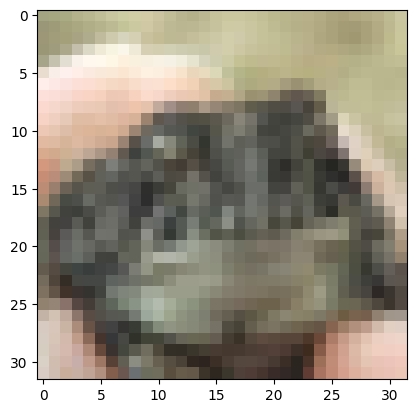

In [6]:
plt.imshow(x_train[25])
names[y_train[25][0]]

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 42ms/step - accuracy: 0.3373 - loss: 1.7845 - val_accuracy: 0.5452 - val_loss: 1.2575
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - accuracy: 0.5616 - loss: 1.2242 - val_accuracy: 0.6212 - val_loss: 1.0897
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 42ms/step - accuracy: 0.6345 - loss: 1.0464 - val_accuracy: 0.6706 - val_loss: 0.9518
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.6799 - loss: 0.9181 - val_accuracy: 0.6670 - val_loss: 0.9644
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7021 - loss: 0.8502 - val_accuracy: 0.7044 - val_loss: 0.8642
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7307 - loss: 0.7691 - val_accuracy: 0.7148 - val_loss: 0.8499
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.7450 - loss: 0.7247 - val_accuracy: 0.7220 - val_loss: 0.8261
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7639 -

In [13]:
y_pred=model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[3.3547804e-01, 9.5603645e-02, 2.8164151e-01, ..., 6.2652193e-02,
        5.5863404e-01, 1.7120627e-01],
       [9.5686322e-01, 9.8337978e-01, 1.3480611e-01, ..., 4.0818326e-04,
        9.9997360e-01, 8.0838168e-01],
       [9.6598184e-01, 8.5868633e-01, 8.2359694e-02, ..., 4.2433616e-02,
        9.9447930e-01, 8.1139523e-01],
       ...,
       [7.4793927e-02, 3.5609453e-04, 8.9117479e-01, ..., 9.2378807e-01,
        8.7462977e-04, 6.5663373e-03],
       [5.9828717e-01, 2.6113749e-01, 3.1912357e-01, ..., 1.4751214e-01,
        1.2528825e-03, 1.9079125e-01],
       [6.0588501e-02, 2.7850333e-03, 2.3586872e-01, ..., 9.9982363e-01,
        4.5480131e-04, 4.7345688e-03]], dtype=float32)

In [14]:
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

array([3, 8, 8, ..., 5, 4, 7])

In [15]:
y_test[2006]

array([7], dtype=uint8)

In [16]:
y_pred1[2006]

np.int64(7)

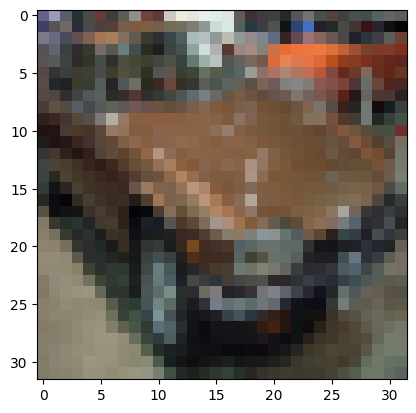

In [17]:
plt.imshow(x_test[2000])

Text(0.5, 1.0, 'y_test : [6],y_pred1:6')

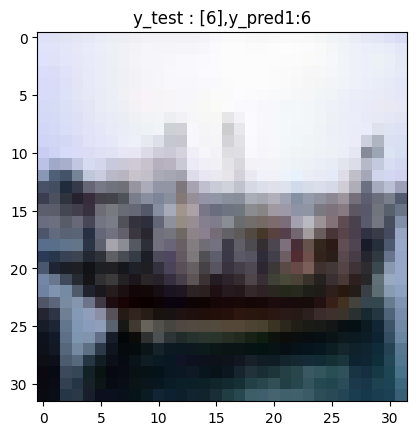

In [18]:
plt.imshow(x_test[18],cmap="gray")
plt.title(f"y_test : {y_test[7]},y_pred1:{y_pred1[7]}")

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy is  : ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7206 - loss: 0.8512
Test accuracy is  :  0.7190999984741211
